<font color='red'>
Grade: A
    
    
Problem 1
    
Part 1: Good
    
Part 2: Good
    
Part 3: Good
    
Part 4: Good

In [1]:
#Import library

import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

## Problem 1

In [2]:
#Check Working directory location
import os
print(os.getcwd())

/Users/siuyinlee/OneDrive/School/Math 5027 Machine Learning/HW


In [3]:
#Read File and check head
data = pd.read_csv('Data/letterCG.data',delim_whitespace=True)
data.head()

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
1,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
2,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
3,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
4,G,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9


In [4]:
#Convert pd dataframe to numpy array

data = data.to_numpy()

# Define X feature matrix, 2nd column to the end
X = data[:, 1:]

# Define y target
y = data[:,0]

#### Split the data into training 70% and validation 30% parts, with a random state of 30.

In [5]:
# Split data into training/test set. Use 30% for test set, with random state =30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

#### 1. Implement the Adaboost algorithm with decision tree with max depth=1as the base classifier and use learning rate=0.2. Run Adaboost for 200 rounds (M=200)

In [6]:
#Build AdaBoost classifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.2, random_state=30)

#Fit Model
ada_clf.fit(X_train, y_train)

#Just to take a look at the accuracy on test data
ada_clf.score(X_test, y_test)

0.9470198675496688

#### 2. Use the staged_score() function (check the function description) on the validation data to get the accuracy score to find the optimal $M$. The final Adaboost ensemble uses the optimal $M$.

In [7]:
#Extract staged score
SS = [s for s in ada_clf.staged_score(X_test, y_test)]

In [8]:
max(SS)

0.9514348785871964

In [9]:
np.argmax(SS)


142

In [10]:
#Double check optimal M
print(SS[142])
#Double check accuracy_score of current model
print(SS[-1])

0.9514348785871964
0.9470198675496688


The optimal M is 143 because staged_score is max on index 142, which means there are 143 models/trees.

In [11]:
#Use the optimal M for final Adaboost ensemble
ada_clf_opt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=143, algorithm="SAMME.R", learning_rate=0.2, random_state=30)
ada_clf_opt.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.2, n_estimators=143, random_state=30)

#### 3. Report the accuracy of prediction with the final ensemble for the validation instances.

In [12]:
ada_clf_opt.score(X_test, y_test)

0.9514348785871964

The accuracy of prediction with the final ensemble for the test set is 0.951

#### 4. Make a plot of the accuracy score vs ensemble size/rounds (M) for the training data. Make the same plot for the validation data on the same figure. What do you find?

Text(0.5, 1.0, 'Accuracy score vs Ensemble rounds (M) for training data and test data')

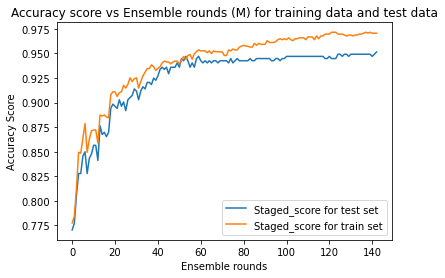

In [13]:
AS_opt_test = [s for s in ada_clf_opt.staged_score(X_test, y_test)]
AS_opt_train = [s for s in ada_clf_opt.staged_score(X_train, y_train)]

plt.plot(AS_opt_test, label ='Staged_score for test set')
plt.plot(AS_opt_train, label = 'Staged_score for train set')
plt.legend()
plt.xlabel('Ensemble rounds')
plt.ylabel('Accuracy Score')
plt.title("Accuracy score vs Ensemble rounds (M) for training data and test data")

From the above graph, we can see that after about 50 rounds, the model starts to have overfitting problem.
